# Calculate the upper bound to accuracy on nested subsets of data.

This notebook shows that the upper bound to accuracy increases on subsets from 72% on the entire set to 85% on samples of size 2000.

In [1]:
import genre_data_loader, genre_upperbound, nested_subsets

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# get currrent date for latest version of data set
%store -r now

X_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now)
y_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now)
X_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_test_{}.csv'.format(now)
y_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_test_{}.csv'.format(now)

In [3]:
# call data loader script
genre_data = genre_data_loader.LoadGenreData(now, X_path_train = X_path_train, y_path_train = y_path_train, 
                                             X_path_test = X_path_test, y_path_test = y_path_test)

In [4]:
# load data with genre sets
data = genre_data.as_sets()
# create list of all genres
list_of_genres = genre_data.get_list_of_genres()

Let's evaluate on nested subsets using the NestedSubsets class:

In [5]:
def subset_runs_errors(data, percentage = .1, runs = 2):
    """
    Input:genre data, percentage=.1, runs=2.
    Output: DF with errors for runs and subsets; 
        mean and std over runs for each subset size
    """
    data = data
    percentage = percentage
    # initialize error DF
    err = pd.DataFrame(columns = [f'run_{i}' for i in range(runs)])
    err.columns.name = 'run'
    err.index.name = 'subset_size'
    for i in range(runs):
        subsets = nested_subsets.NestedSubsets(data, percentage = percentage)
        sample_size = subsets.sample_size # get size of first subsample (=full set)
        for subset in subsets:
            if sample_size > subsets.remainder_size:
                error = genre_upperbound.UpperBound(subset)[1] 
                err.at[sample_size,f'run_{i}'] = error
                sample_size = subsets.sample_size
            else:
                break
    err['mean'] = err.mean(axis = 1)
    err['std'] = err.std(axis = 1)
    return err

In [6]:
err = subset_runs_errors(data,.1,10)

In [7]:
runs = 10
acc = 1- err[[f'run_{i}' for i in range(runs)]+['mean']]
acc['std'] = acc.std(axis = 1)

In [8]:
acc

run,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,mean,std
subset_size,,,,,,,,,,,,
15470,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,1.110223e-16
13923,0.863248,0.864038,0.861811,0.862673,0.862745,0.862817,0.863248,0.862099,0.864397,0.862314,0.862939,7.756553e-04
12376,0.866193,0.866273,0.864981,0.86595,0.864981,0.864415,0.866273,0.863849,0.865789,0.862557,0.865126,1.169030e-03
10829,0.869055,0.86924,0.868501,0.869702,0.866008,0.86647,0.868686,0.866747,0.869332,0.865269,0.867901,1.525863e-03
9282,0.871903,0.870933,0.869963,0.874165,0.86727,0.868024,0.871687,0.871472,0.87201,0.867593,0.870502,2.133645e-03
7735,0.877828,0.876277,0.872269,0.877957,0.870588,0.871364,0.873691,0.876406,0.875113,0.871105,0.874260,2.681640e-03
6188,0.880575,0.878313,0.876374,0.883807,0.874758,0.87298,0.875889,0.880575,0.879606,0.87201,0.877489,3.545937e-03
4641,0.887309,0.881491,0.882784,0.894419,0.885585,0.885585,0.884939,0.88343,0.887309,0.874811,0.884766,4.722567e-03
3094,0.893988,0.883969,0.886555,0.895604,0.890433,0.897544,0.893665,0.88914,0.894958,0.878151,0.890401,5.746270e-03


In [9]:
err

run,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,mean,std
subset_size,,,,,,,,,,,,
15470,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,2.775558e-17
13923,0.136752,0.135962,0.138189,0.137327,0.137255,0.137183,0.136752,0.137901,0.135603,0.137686,0.137061,7.756553e-04
12376,0.133807,0.133727,0.135019,0.13405,0.135019,0.135585,0.133727,0.136151,0.134211,0.137443,0.134874,1.169030e-03
10829,0.130945,0.13076,0.131499,0.130298,0.133992,0.13353,0.131314,0.133253,0.130668,0.134731,0.132099,1.525863e-03
9282,0.128097,0.129067,0.130037,0.125835,0.13273,0.131976,0.128313,0.128528,0.12799,0.132407,0.129498,2.133645e-03
7735,0.122172,0.123723,0.127731,0.122043,0.129412,0.128636,0.126309,0.123594,0.124887,0.128895,0.125740,2.681640e-03
6188,0.119425,0.121687,0.123626,0.116193,0.125242,0.12702,0.124111,0.119425,0.120394,0.12799,0.122511,3.545937e-03
4641,0.112691,0.118509,0.117216,0.105581,0.114415,0.114415,0.115061,0.11657,0.112691,0.125189,0.115234,4.722567e-03
3094,0.106012,0.116031,0.113445,0.104396,0.109567,0.102456,0.106335,0.11086,0.105042,0.121849,0.109599,5.746270e-03


Text(0, 0.5, 'errors')

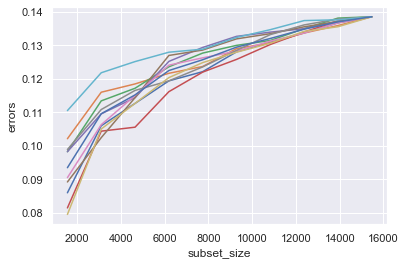

In [10]:
runs = 10
fig, ax = plt.subplots()
(err[[f'run_{i}' for i in range(runs)]+['mean']]).plot(use_index = True, ax = ax)
ax.legend().remove()
plt.ylabel('errors')

Text(0.5, 0, 'Subset Size')

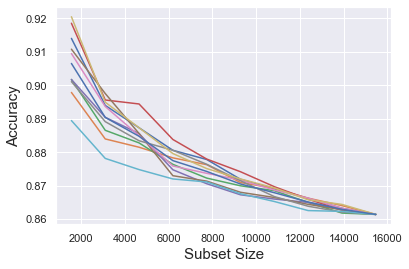

In [15]:
runs = 10
fig, ax = plt.subplots()
(acc[[f'run_{i}' for i in range(runs)]+['mean']]).plot(use_index = True, ax = ax)
ax.legend().remove()
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Subset Size', fontsize = 15)
# plt.title('Upper bound to accuracy over 10 runs of nested subsets', fontsize = 14)

In [16]:
fig.savefig('/Users/Daniel/Code/Genre/visualizations/upperbound_curves.png', dpi = 144)